In [3]:
#pip install gensim matplotlib scikit-learn umap-learn numpy

import gensim.downloader as api
import matplotlib.pyplot as plt
import pprint
from sklearn.manifold import TSNE
import umap
import numpy as np

In [4]:
#word 2 vec gets words next to a word to figure out relationship
#glove gets words within a document and co-occurance matrix to learn
word2vec = api.load('word2vec-google-news-300')
glove = api.load('glove-twitter-25')
models = [word2vec, glove]

In [ ]:
#basic model stuff
#most similar words to earth
print("Most similar words to Earth for each Model: ")
pprint.pprint(word2vec.most_similar("earth")[:3])
pprint.pprint(glove.most_similar("earth")[:3])
vector_result = glove['pencil'] - glove['graphite'] + glove['ink'] + glove['permanent']
vector_result2 = word2vec['pencil'] - word2vec['graphite'] + word2vec['ink'] + word2vec['permanent']

print("Trying for pen with the analogy (shows not indestructable)")
similar_word = glove.most_similar([vector_result], topn=5)
similar_word2 = word2vec.most_similar([vector_result2], topn=5)
pprint.pprint(similar_word)
pprint.pprint(similar_word2)

Most similar words to Earth for each Model: 
[('Earth', 0.7105128169059753),
 ('planet', 0.6802847981452942),
 ('meek_inheriting', 0.5625147223472595)]
[('world', 0.9150878190994263),
 ('universe', 0.9133193492889404),
 ('hidden', 0.8930495381355286)]
Trying for pen with the analogy
[('stick', 0.9143663048744202),
 ('touch', 0.9107198715209961),
 ('use', 0.9004569053649902),
 ('lines', 0.8937069773674011),
 ('figure', 0.8929543495178223)]
[('ink', 0.6406137943267822),
 ('pencil', 0.5919104814529419),
 ('permanent', 0.5275610089302063),
 ('pen', 0.5174789428710938),
 ('pencils', 0.46136006712913513)]


c:\Users\wyatt\AI\AIModels\LLMRandom\A-Collection-of-LLM-code\.conda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\wyatt\AI\AIModels\LLMRandom\A-Collection-of-LLM-code\.conda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


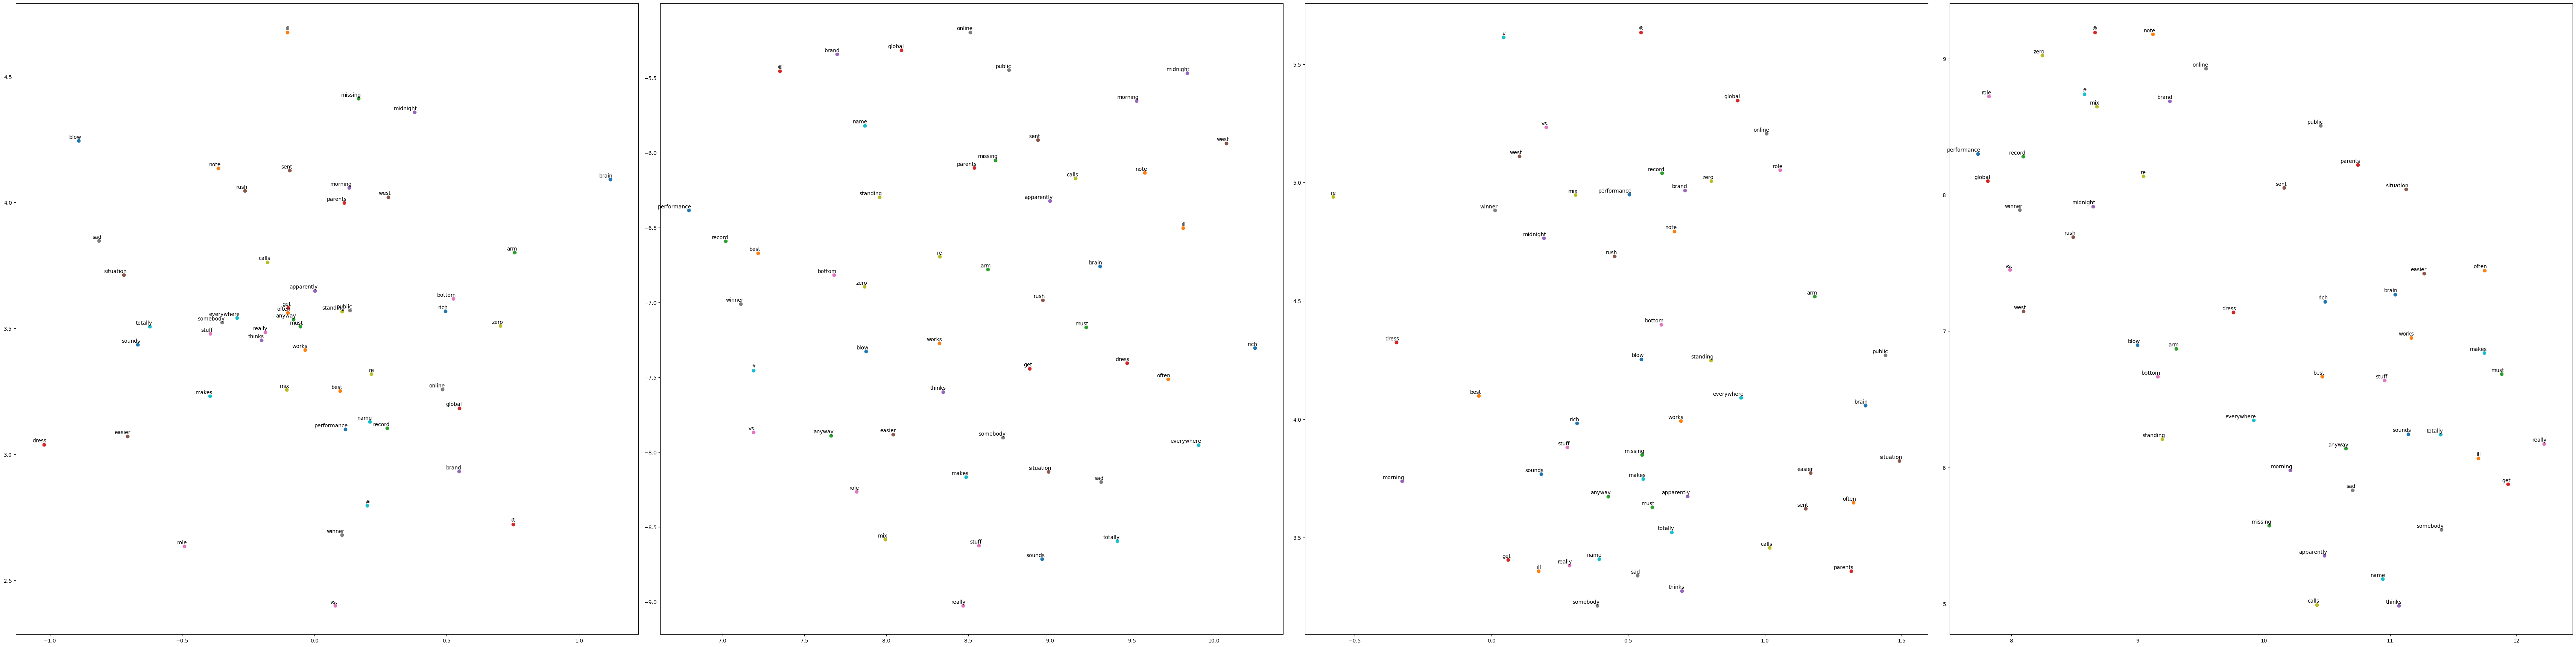

In [8]:
#plot vectors with UMAP and T-SNE

PLOTSIZE = (120, 120)
#gets a list of sample words by finding 50 common words in both word2vec and glove
sampleOfWords = list(set(word2vec.index_to_key[50:5000])
                       & set(glove.index_to_key[50:5000]))[:50]
#2d, slightly higher perplexity, max of 2000 iterations and stop early is 300 done without much change
tsneModel = TSNE(perplexity=40, n_components=2, n_iter_without_progress=300, n_iter=2000)
umapModel = umap.UMAP() #most defaults should work here
plt.figure(figsize=PLOTSIZE)
row = 0
for model in models:
    labels = []
    tokens = []
    for word in sampleOfWords:
        labels.append(word)
        tokens.append(model[word]) #appends the vector
    
    #T-SNE
    tsneValues = tsneModel.fit_transform(np.array(tokens))
    umapValues = umapModel.fit_transform(np.array(tokens))
    plt.subplot(7, 7, row*2+1)
    i = 0
    for value in tsneValues:
        plt.scatter(value[0], value[1])
        #write the label below the point
        plt.annotate(labels[i], xy=(value[0], value[1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
        i += 1
    plt.subplot(7, 7, row*2+2)
    i = 0
    for value in umapValues:
        plt.scatter(value[0], value[1])
        plt.annotate(labels[i], xy=(value[0], value[1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
        i += 1
    row += 1
plt.tight_layout() #labeled so don't need key
plt.show()


    
    